In [41]:
#Import packages
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import scipy
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import fdrcorrection
from matplotlib_venn import venn2
import sys
from matplotlib_venn import venn3
from scipy.stats import linregress
from bioinfokit import analys, visuz
from bioinfokit.analys import stat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import miceforest as mf
import plotly.express as px

In [42]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [43]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## General metabolomics


In [44]:
# load data file
Normalized_df2 = pd.read_csv (r'.\generalmetabolomics_patient001.csv', index_col=0)
Normalized_df2

,Compounds,Expert Pre,Expert Post,ttest_pvalue,Grp6 Mean,Grp5 Mean,Fold Change(Grp6/Grp5),Log2(Fold Change),Grp6/Grp5 pi score
Compound ID,,,,,,,,,
inosine,inosine,5553,53,4.181309e-03,5.266667e+01,3.032083e+03,0.009544,-6.711131,-13.908843
110021,110021,1248,36,4.642087e-02,1.475000e+02,3.585000e+02,0.028846,-5.115477,-1.708285
pipecolinic acid,pipecolinic acid,8630,347,1.506720e-02,6.367500e+02,2.902333e+03,0.040209,-4.636353,-3.987220
390241,390241,6518,362,2.942096e-02,1.584167e+02,2.190833e+03,0.055539,-4.170368,-5.803306
6405,6405,1319,76,2.132582e-02,7.108333e+01,6.225833e+02,0.057619,-4.117301,-5.231668
...,...,...,...,...,...,...,...,...,...
N-acetylornithine,N-acetylornithine,161,23686,2.790000e-05,3.310008e+04,5.064083e+03,147.118012,7.200830,12.335138
5995,5995,63,18913,1.050000e-07,1.938583e+04,2.467917e+03,300.206349,8.229811,20.748680
5935,5935,99,38041,2.280000e-06,4.453450e+04,6.478417e+03,384.252525,8.585911,15.691213


In [45]:
df = Normalized_df2
df

,Compounds,Expert Pre,Expert Post,ttest_pvalue,Grp6 Mean,Grp5 Mean,Fold Change(Grp6/Grp5),Log2(Fold Change),Grp6/Grp5 pi score
Compound ID,,,,,,,,,
inosine,inosine,5553,53,4.181309e-03,5.266667e+01,3.032083e+03,0.009544,-6.711131,-13.908843
110021,110021,1248,36,4.642087e-02,1.475000e+02,3.585000e+02,0.028846,-5.115477,-1.708285
pipecolinic acid,pipecolinic acid,8630,347,1.506720e-02,6.367500e+02,2.902333e+03,0.040209,-4.636353,-3.987220
390241,390241,6518,362,2.942096e-02,1.584167e+02,2.190833e+03,0.055539,-4.170368,-5.803306
6405,6405,1319,76,2.132582e-02,7.108333e+01,6.225833e+02,0.057619,-4.117301,-5.231668
...,...,...,...,...,...,...,...,...,...
N-acetylornithine,N-acetylornithine,161,23686,2.790000e-05,3.310008e+04,5.064083e+03,147.118012,7.200830,12.335138
5995,5995,63,18913,1.050000e-07,1.938583e+04,2.467917e+03,300.206349,8.229811,20.748680
5935,5935,99,38041,2.280000e-06,4.453450e+04,6.478417e+03,384.252525,8.585911,15.691213


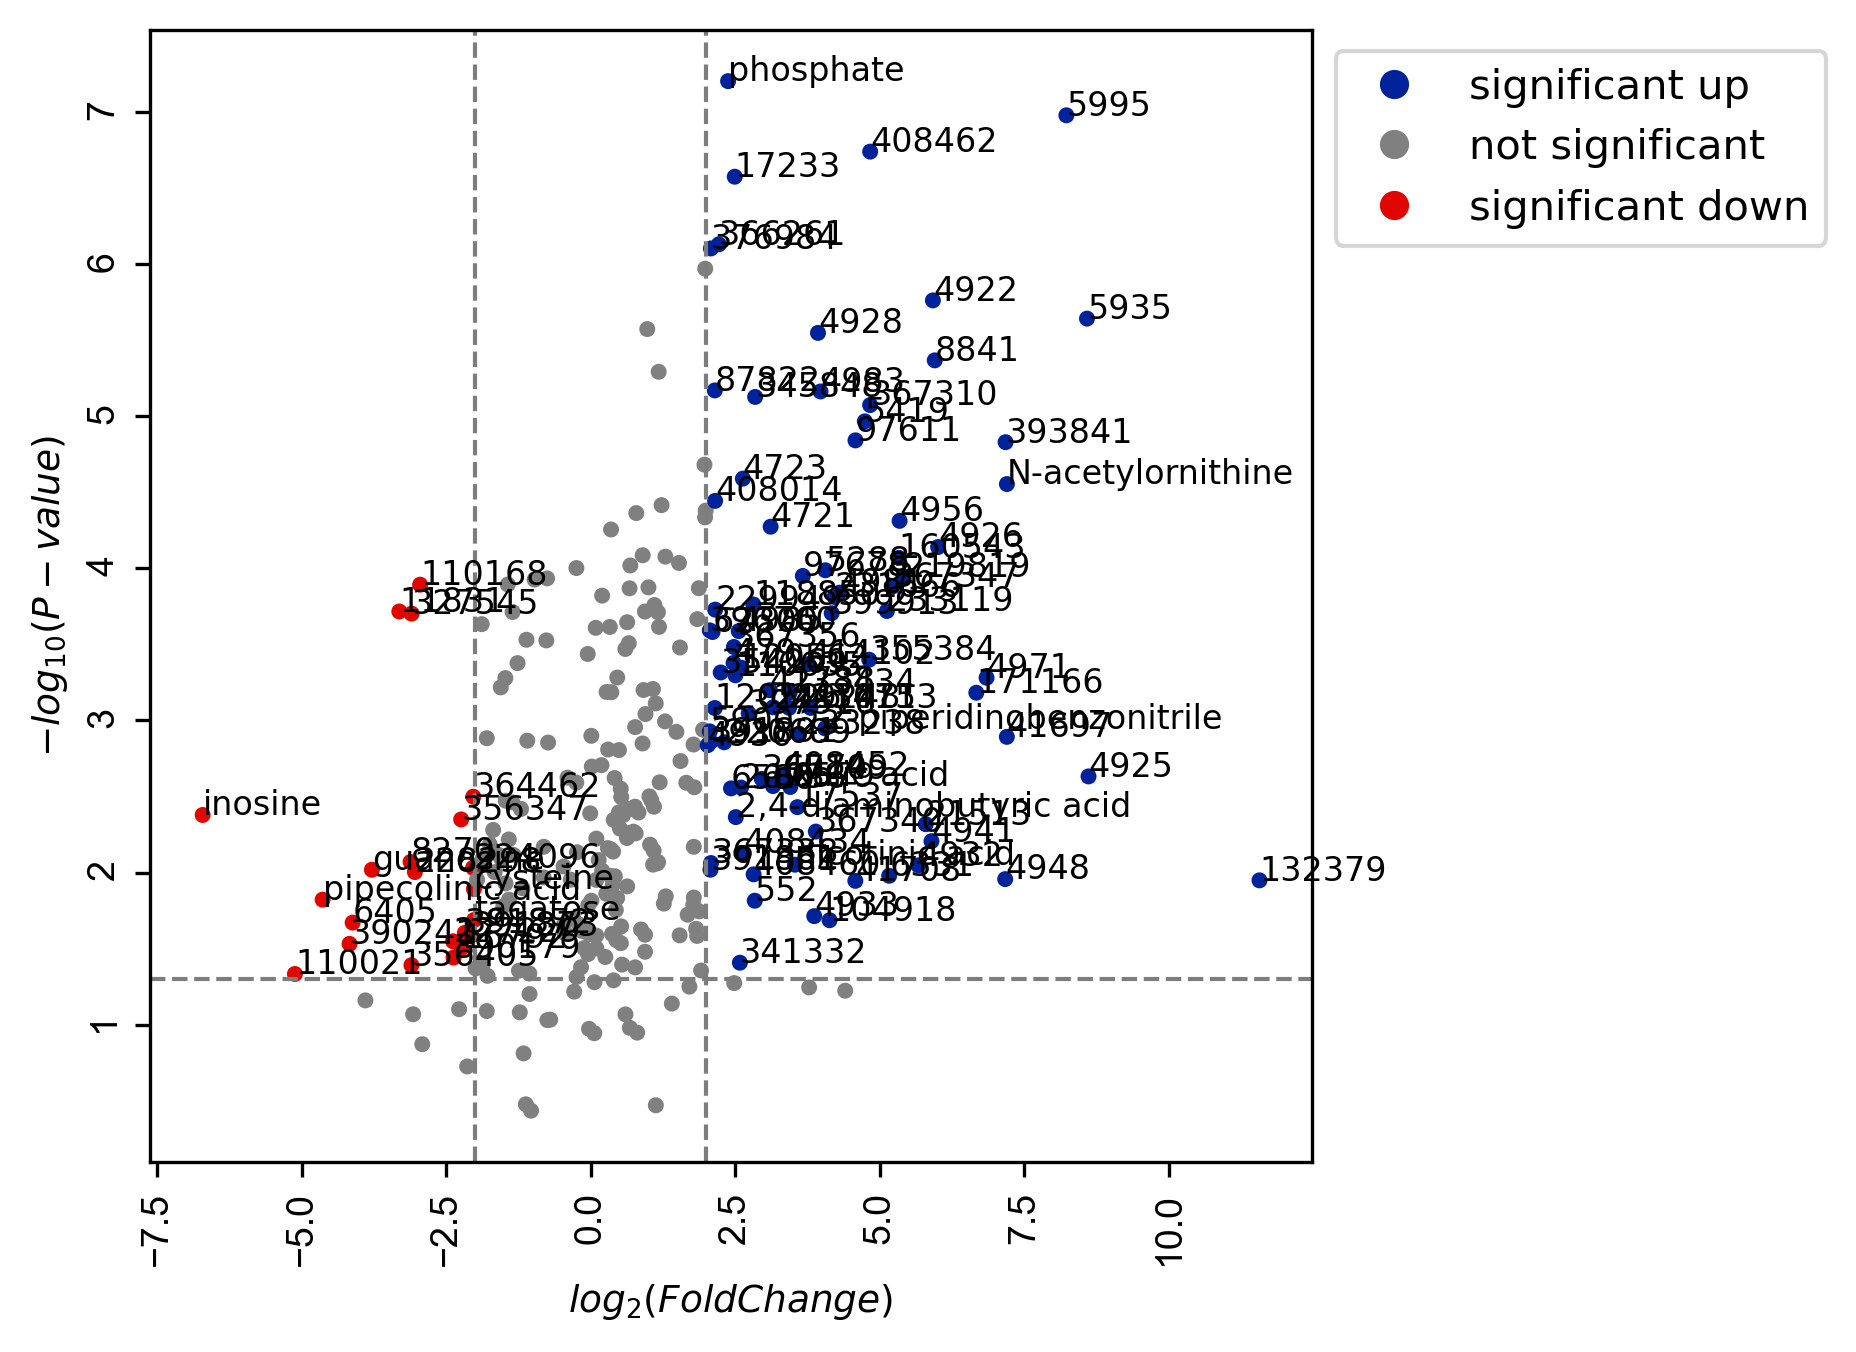

In [51]:
#Visualize binary comparison 
visuz.GeneExpression.volcano(df=df, show = True, lfc='Log2(Fold Change)', pv='ttest_pvalue', geneid="Compounds", lfc_thr=(2, 2), pv_thr=(.05, .05), genenames = 'deg',
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, gstyle=1, sign_line=True, legendpos='upper right', 
    legendanchor=(1.46,1), r=1200)

## Lipidomics

In [53]:
# load data file
Normalized_df = pd.read_csv (r'.\lipidomics_patient001.csv', index_col=0)
Normalized_df

,Annotation,Species,InChI Key,m/z,Unnamed: 5,RT,Expert Pre,Expert Post,ttest_pvalue,Grp6 Mean,Grp5 Mean,Fold Change(Grp6/Grp5),Log2(Fold Change),Grp6/Grp5 pi score
Identifier,,,,,,,,,,,,,,
3.25_345.30_3.26_367.28,1_MG 17:0/0:0/0:0 iSTD,[M+H]+_[M+Na]+,SVUQHVRAGMNPLW-UHFFFAOYSA-N,345.3_367.2828,ESI (+),3.257500,19036,19138,0.019877,32747.250000,18050.833330,1.814168,0.859308,1.462245
2.94_303.23,FA 20:4,[M-H]-,HQPCSDADVLFHHO-LTKCOYKYSA-N,303.2342,ESI (-),2.941000,8767,8569,0.026993,52833.583330,10240.666670,5.159194,2.367146,3.713461
3.99_658.44,PC 25:0,[M+Na]+,VMLCCSLGXVMPQE-UHFFFAOYNA-N,658.4435,ESI (+),3.992000,12336,17839,0.001969,24471.583330,10587.833330,2.311293,1.208700,3.270414
9.46_733.57_9.53_717.60_9.47_712.65,TG 40:0,[M+K]+_[M+Na]+_[M+NH4]+,XTHFMIVZMLNNFC-RRHRGVEJSA-N,733.5737_717.6011_712.6473,ESI (+),9.484667,1294,1471,0.190485,2107.750000,16011.083330,0.131643,-2.925295,-2.106617
8.94_731.56_8.95_715.58_9.03_710.63,TG 40:1,[M+K]+_[M+Na]+_[M+NH4]+,GKTDXHXZBFIZJU-OIJJMQLXSA-N,731.5591_715.5843_710.6285,ESI (+),8.971667,461,328,0.088165,711.833333,2354.666667,0.302307,-1.725911,-1.820325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.16_761.57,1368,[M-H]-,NaN,761.5701,ESI (-),5.159000,4124,5865,0.051085,12439.916670,5829.833333,2.133837,1.093450,1.412421
5.62_590.48,1507,[M-H]-,NaN,590.4793,ESI (-),5.620000,7028,3215,0.000637,4934.916667,6624.416667,0.744959,-0.424768,-1.357591
5.63_588.48,1512,[M-H]-,NaN,588.4775,ESI (-),5.633000,15350,6184,0.000315,8997.166667,13350.833330,0.673903,-0.569387,-1.994163


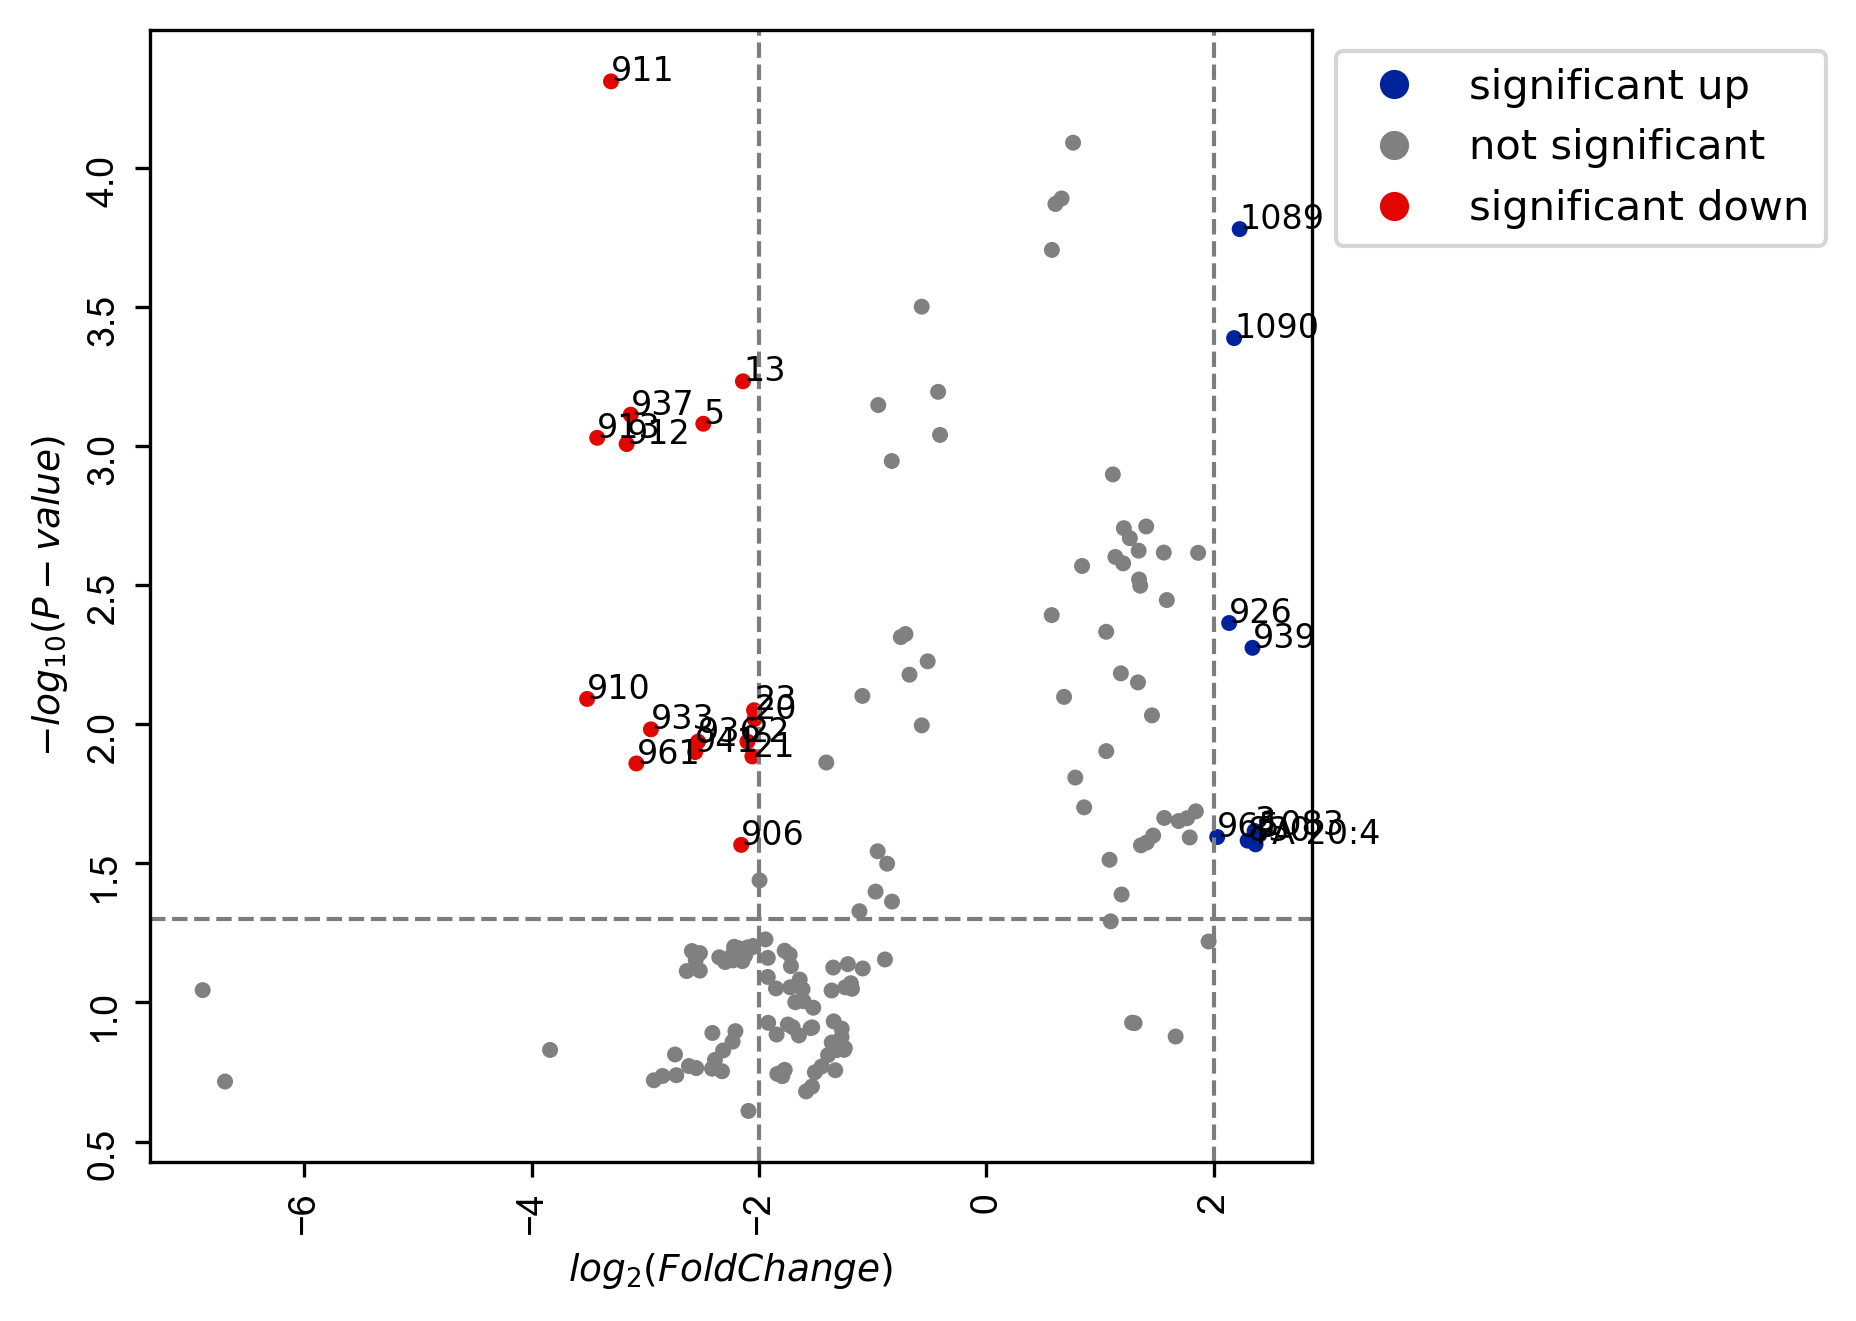

In [54]:
#Visualize binary comparison 
visuz.GeneExpression.volcano(df=Normalized_df, show = True, lfc='Log2(Fold Change)', pv='ttest_pvalue', geneid="Annotation", lfc_thr=(2, 2), pv_thr=(.05, .05), genenames = 'deg',
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, gstyle=1, sign_line=True, legendpos='upper right', 
    legendanchor=(1.46,1), r=1200)

## HILIC

In [56]:
# load data file
df2 = pd.read_csv (r'.\HILIC_patient001.csv', index_col=0)
df2

,Compounds,Expert Pre,Expert Post,ttest_pvalue,Grp6 Mean,Grp5 Mean,Fold Change(Grp6/Grp5),Log2(Fold Change),#NAME?,Grp6/Grp5 pi score
Compound ID,,,,,,,,,,
(His-Ala or Ala-His),(His-Ala or Ala-His),186,114,0.009804,179.416667,269.666667,0.665328,-0.587863,2.008595,-1.180779
(Phe-Leu or Phe-Ile),(Phe-Leu or Phe-Ile),268,164,0.002531,159.416667,1968.750000,0.080974,-3.626406,2.596710,-9.416723
(Ser-Ala or Ala-Ser),(Ser-Ala or Ala-Ser),3189,76,0.000113,57.583333,7196.500000,0.008002,-6.965500,3.948591,-27.503909
(Val-Arg or Arg-Val),(Val-Arg or Arg-Val),1701,186,0.000455,218.250000,8251.583333,0.026449,-5.240617,3.342435,-17.516424
2-Hydroxyquinoline,2-Hydroxyquinoline,3029,1661,0.001410,2169.250000,4904.583333,0.442290,-1.176934,2.850670,-3.355052
...,...,...,...,...,...,...,...,...,...,...
1402,1402,17437,53704,0.000007,60480.166670,23403.666670,2.584218,1.369728,5.152419,7.057410
1403,1403,108295,142210,0.000141,173422.833300,85597.833330,2.026019,1.018648,3.849292,3.921072
1406,1406,4711,5821,0.000132,7068.416667,3550.166667,1.991010,0.993500,3.878567,3.853357


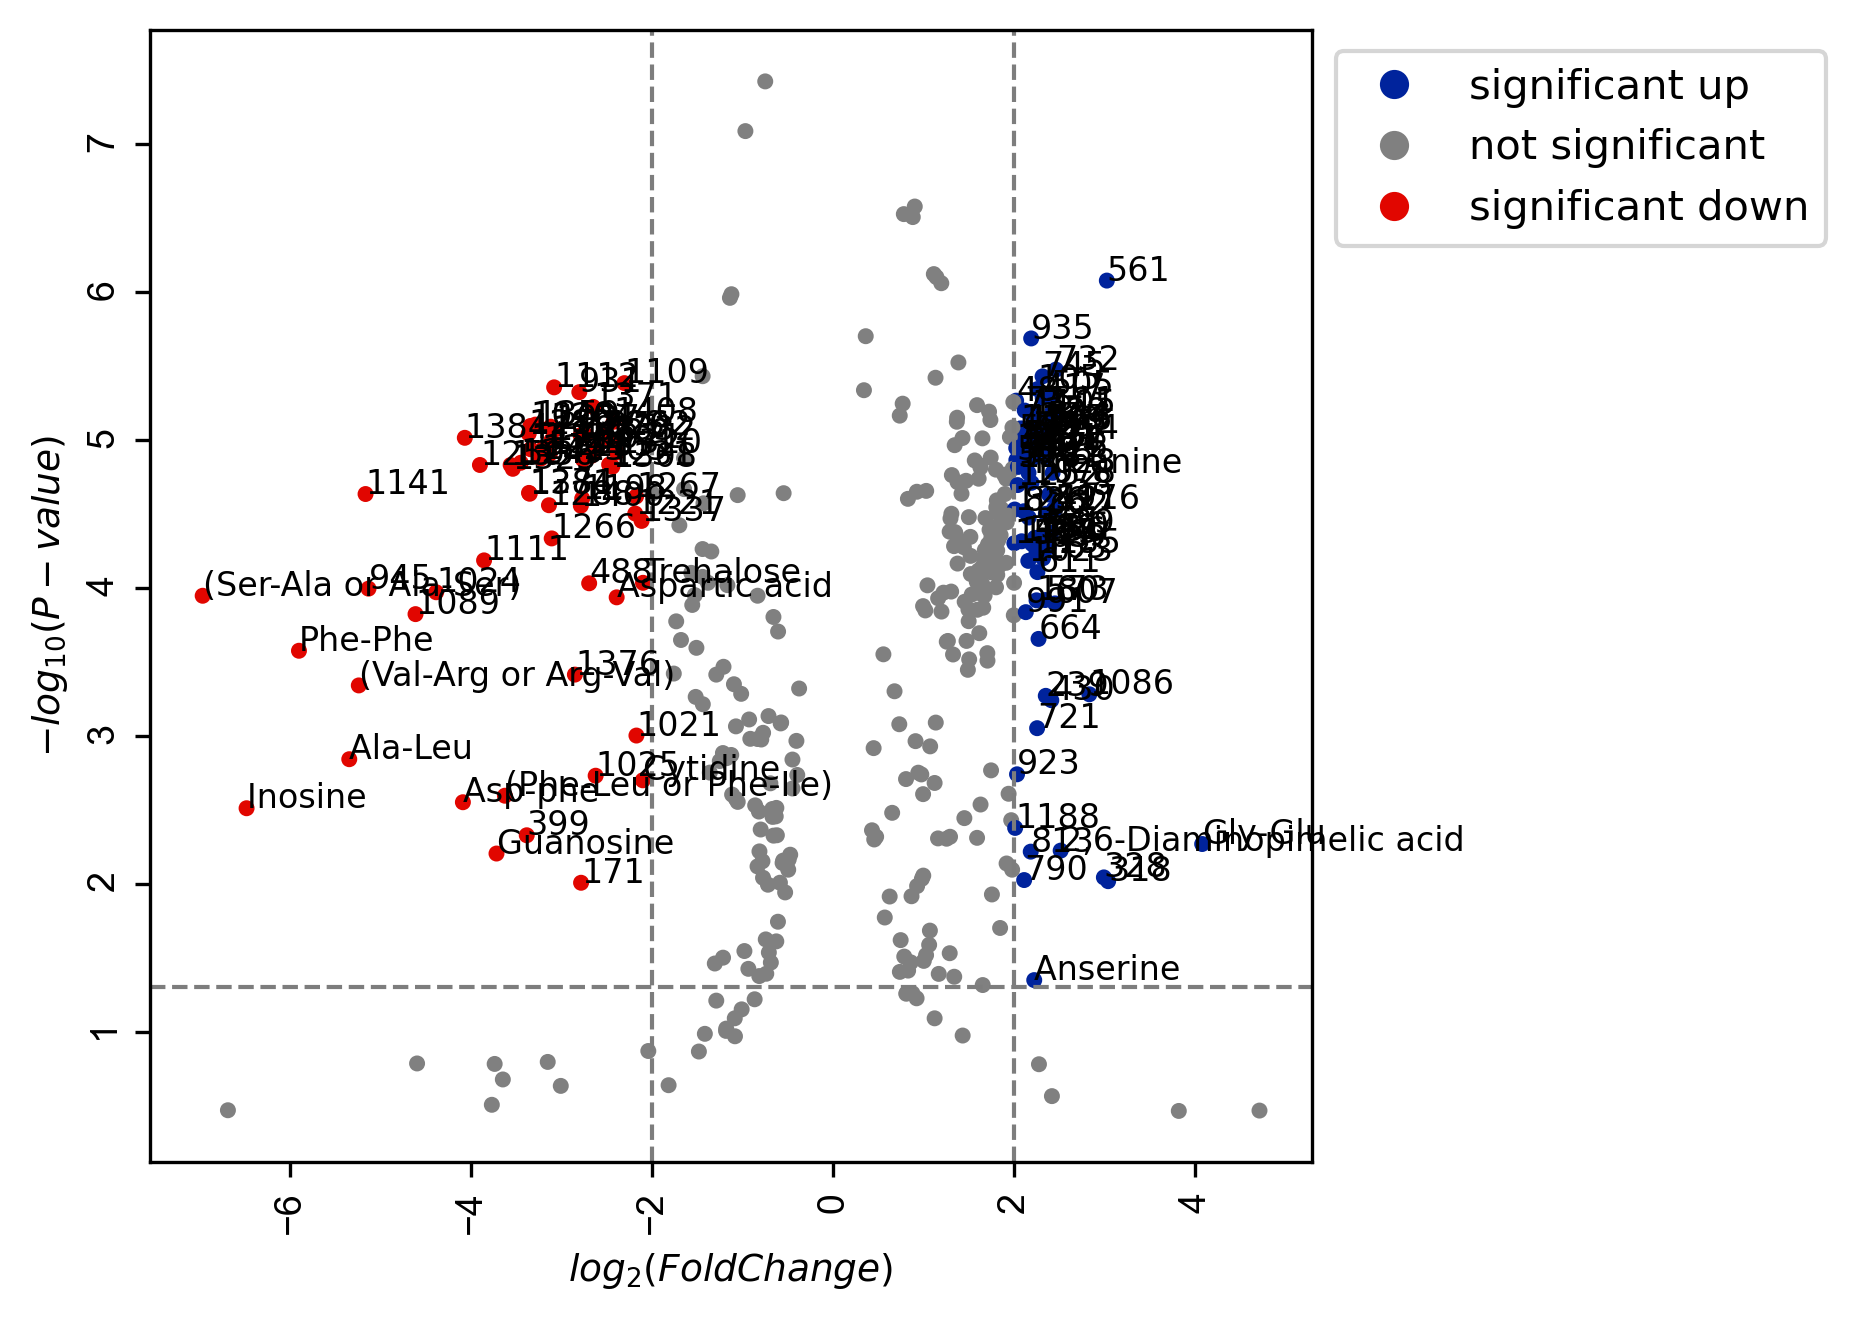

In [58]:
#Visualize binary comparison 
visuz.GeneExpression.volcano(df=df2, show = True, lfc='Log2(Fold Change)', pv='ttest_pvalue', geneid="Compounds", lfc_thr=(2, 2), pv_thr=(.05, .05), genenames = 'deg',
    color=("#00239CFF", "grey", "#E10600FF"), plotlegend=True, gstyle=1, sign_line=True, legendpos='upper right', 
    legendanchor=(1.46,1), r=1200)